In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cdd
from modulus_tools import demo_graphs
from modulus_tools import algorithms as alg
from itertools import product

In [8]:
######################################################################
# import necessary libraries

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cvxpy as cvx
#from cvxpy.solvers import qp
from fractions import Fraction
import math

In [10]:
G= nx.Graph()
nx.add_path(G,(0,1,2,3,0,2))
pos = nx.spring_layout(G)

In [11]:
from itertools import combinations
def sub_lists(my_list):
	subs = []
	for i in range(0, len(my_list)+1):
	    temp = [list(x) for x in combinations(my_list, i)]
	    if len(temp)>0:
	        subs.extend(temp)
	return subs
def good_sub_lists(my_list):
    B= []
    for l in sub_lists(my_list):
        
        if len(l)<= 1:
            B.append(l)
        else:
            passed = True
            for i in range(0,len(l)-1):
                if l[i]>=l[i+1]:
                    passed = False
            if  passed:
                B.append(l)
    return B
def MISS(l): 
    miss = []
    for t  in  good_sub_lists(l):
        passed= True
        for s in  good_sub_lists(l):
            if all(x in s for x in t) == True:
                if all(x in t for x in s)== False:
                    passed = False
        if passed:
            miss.append(t)
    return miss
def MISSR(l):
    rows = []
    for s in MISS(l):
        row = len(l)*[0]
        for i in range(len(l)):
            if l[i] in s:
                row[i]=1        
        rows.append(row)
    return rows
def MISSI(l,s):
    row = []
    for i in range(len(l)):
        if l[i] in s:                 
            row.append(i+1)
    return row

In [12]:

def dual(l):
    m = len(l)
    misss =  MISSR(l)
    # initialize an empty list of rows for the augmented matrix
    rows = []
    # add rows corresponding to the constraints rho >= 0
    for i in range(1,len(l)+1):
        row = (m+1)*[0]
        row[i] = 1
        rows.append(row)   
    # add rows corresponding to the constraints N*rho >= 1
    for miss in misss:
        row = [-1] + miss
        rows.append(row)   
    # create the polyhedron in cdd
    mat = cdd.Matrix(rows, number_type='fraction')
    mat.rep_type = cdd.RepType.INEQUALITY
    poly = cdd.Polyhedron(mat)
    ext = poly.get_generators()
    # list of dual objects
    dual = []
    # loop over extreme points and directions
    for i in range(ext.row_size):
    
        # skip extreme directions
        if ext[i][0] == 0:
            continue
        
        # add the vector representation of the dual object
        dual.append(ext[i][1:])
    return dual


In [13]:
# Efficient Python 3 Program to find
# inverse permutation.
 
# function to find inverse permutations
def inversePermutation(arr) :
    l = len(arr)
    # To store element to index mappings
    arr2 = [0] *l
     
    # Inserting position at their
    # respective element in second array
    for i in range(0,l) :
        arr2[arr[i] - 1] = i + 1
     
    return arr2

In [17]:
def PG(l):
    G = nx.Graph()
    for i in range(len(l)):
        for j in range(len(l)):
            if i < j:
                if l[i]>l[j]:
                    G.add_edge(i,j)
    pos = nx.circular_layout(G)
    labels = {u:(u+1)  for u in G.nodes}
    nx.draw(G, pos, node_size=200, node_color='gray', edge_color='gray')
    nx.draw_networkx_labels(G, pos,labels=labels, font_size=12)

In [18]:
import itertools
list(itertools.permutations(range(1,4)))
   

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [19]:
from itertools import combinations
def dsub_lists(my_list):
	subs = []
	for i in range(0, len(my_list)+1):
	    temp = [list(x) for x in combinations(my_list, i)]
	    if len(temp)>0:
	        subs.extend(temp)
	return subs
def dgood_sub_lists(my_list):
    B= []
    for l in dsub_lists(my_list):
        
        if len(l)<= 1:
            B.append(l)
        else:
            passed = True
            for i in range(0,len(l)-1):
                if l[i]<=l[i+1]:
                    passed = False
            if  passed:
                B.append(l)
    return B
def dMISS(l): 
    miss = []
    for t  in  dgood_sub_lists(l):
        passed= True
        for s in  dgood_sub_lists(l):
            if all(x in s for x in t) == True:
                if all(x in t for x in s)== False:
                    passed = False
        if passed:
            miss.append(t)
    return miss
def dMISSR(l):
    rows = []
    for s in dMISS(l):
        row = len(l)*[0]
        for i in range(len(l)):
            if l[i] in s:
                row[i]=1        
        rows.append(row)
    return rows
def dMISSI(l,s):
    row = []
    for i in range(len(l)):
        if l[i] in s:                 
            row.append(i+1)
    return row

In [10]:
def ddual(l):
    m = len(l)
    misss =  dMISSR(l)
    # initialize an empty list of rows for the augmented matrix
    rows = []
    # add rows corresponding to the constraints rho >= 0
    for i in range(1,len(l)+1):
        row = (m+1)*[0]
        row[i] = 1
        rows.append(row)   
    # add rows corresponding to the constraints N*rho >= 1
    for miss in misss:
        row = [-1] + miss
        rows.append(row)   
    # create the polyhedron in cdd
    mat = cdd.Matrix(rows, number_type='fraction')
    mat.rep_type = cdd.RepType.INEQUALITY
    poly = cdd.Polyhedron(mat)
    ext = poly.get_generators()
    # list of dual objects
    dual = []
    # loop over extreme points and directions
    for i in range(ext.row_size):
    
        # skip extreme directions
        if ext[i][0] == 0:
            continue
        
        # add the vector representation of the dual object
        dual.append(ext[i][1:])
    return dual


In [11]:
np.random.seed(54667)
l =   np.random.permutation(range(1,7))
good = True
for j in list(ddual(l)):
    passed = False
    for k in list(MISSR(l)):
        passed = np.linalg.norm(np.array(j)- np.array(k)) < 1e-8 or passed
    if not passed:
         good = False
if good:
    print('Subset test passed')
else:
    print('Subset test not passed') 

Subset test not passed


In [ ]:
#np.random.seed(2)
l =   np.random.permutation(range(1,17))
good = True
for j in list(ddual(l)):
    passed = False
    for k in list(MISSR(l)):
        passed = np.linalg.norm(np.array(j)- np.array(k)) < 1e-8 or passed
    if not passed:
         good = False
if good:
    print('Subset test passed')
else:
    print('Subset test not passed') 
#k = inversePermutation(l)
print(l)
#print(k)
print('c')
print(MISS(l))
#print(MISS(k))
print('c')
print(MISSR(l))
#print(MISSR(k))
print('c')
print(dual(l))
#print(dual(k))

In [13]:
#k = inversePermutation(l)
print(l)
#print(k)
print('c')
print(dMISS(l))
#print(MISS(k))
print('c')
print(dMISSR(l))
#print(MISSR(k))
print('c')
print(ddual(l))
#print(dual(k))

[4 2 6 5 3 1]
c
[[4, 2, 1], [4, 3, 1], [6, 5, 3, 1]]
c
[[1, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 1], [0, 0, 1, 1, 1, 1]]
c
[(0, 0, 0, 0, 0, 1), (0, 1, 0, 0, 1, 0), (1, 0, 0, 0, 1, 0), (1, 0, 1, 0, 0, 0), (1, 0, 0, 1, 0, 0)]


In [14]:

good = True
for j in list(ddual(l)):
    passed = False
    for k in list(MISSR(l)):
        passed = np.linalg.norm(np.array(j)- np.array(k)) < 1e-8 or passed
    if not passed:
         good = False
if good:
    print('Subset test passed')
else:
    print('Subset test not passed')
if len(dual(l)) == len(dMISSR(l)):
    print('Equality test passed')
else:
    print('Equality test not passed')

Subset test not passed
Equality test passed


In [15]:
import itertools
from permutation import Permutation
for l in list(itertools.permutations(range(1,2))):
    
    good = True
    for j in list(dual(l)):
        passed = False
        for k in list(dMISSR(l)):
            passed = np.linalg.norm(np.array(j)- np.array(k)) < 1e-8 or passed
        if not passed:
             good = False
    if good:
        print()
    else:
        print('Subset test not passed')
        print(l)
        print(MISS(l))
        print(MISSR(l))
        print('dual')
        print(dual(l))
        print('dcrease')
        print(dMISSR(l))
    good = True
    for j in list(dMISSR(l)):
        passed = False
        for k in list(dual(l)):
            passed = np.linalg.norm(np.array(j)- np.array(k)) < 1e-8 or passed
        if not passed:
             good = False
    if good:
        print()
    else:
        print('Subset test 2 not passed')

[3, 1, 4, 2]
[[3, 4], [1, 4], [1, 2]]
[[1, 0, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1]]
dual
[(0, 0, 1, 1), (0, 1, 1, 0), (1, 1, 0, 0)]
dcrease
[[1, 1, 0, 0], [1, 0, 0, 1], [0, 0, 1, 1]]


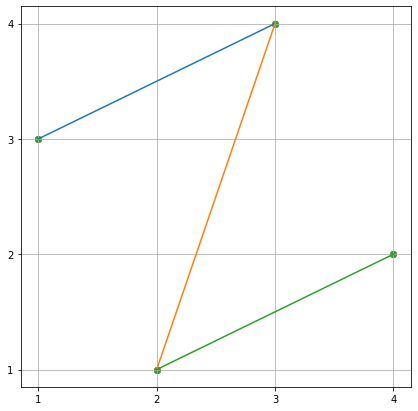

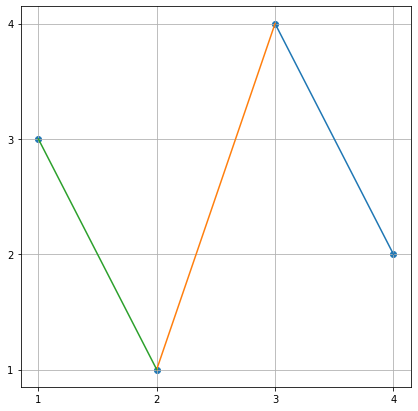

In [16]:
l = [ 3, 1, 4, 2]
print(l)
print(MISS(l))
print(MISSR(l))
print('dual')
print(dual(l))
print('dcrease')
print(dMISSR(l))
x = range(1,len(l)+1)
fig, ax = plt.subplots(1,1,figsize=(7, 7))
for ga in MISS(l):
    I = MISSI(l,ga)
    # initialize figure 
    plt.scatter(x,l)
    plt.plot(I,ga)

# Set the ticks to be at the edges of the bins.
ax.set_xticks(range(1,len(l)+1))
ax.set_yticks(range(1,len(l)+1))
plt.grid(True)

None

fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(x,l)
for du in dual(l):
    ga =[]
    I  =[]
    for i in range(len(l)):
        if du[i] == 1:
            ga.append(i+1) 
            I.append(l[i])
    # initialize figure 
    
    plt.plot(ga,I)

# Set the ticks to be at the edges of the bins.
ax.set_xticks(range(1,len(l)+1))
ax.set_yticks(range(1,len(l)+1))
plt.grid(True)

None

In [17]:
l =   np.random.permutation(range(1,14))
print(l)
print(MISS(l))
print(MISSR(l))
print('dual')
print(dual(l))

[ 6  1 10 13  3 12  9  8  2 11  5  4  7]
[[6, 7], [6, 10, 13], [6, 10, 12], [6, 10, 11], [6, 9, 11], [6, 8, 11], [1, 10, 13], [1, 10, 12], [1, 10, 11], [1, 3, 12], [1, 2, 11], [1, 3, 9, 11], [1, 3, 8, 11], [1, 3, 5, 7], [1, 3, 4, 7], [1, 2, 5, 7], [1, 2, 4, 7]]
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]]
dual
[(0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 